In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16,6))

In [2]:
position=pd.read_csv('Positions_with_fin.csv')
position['month'] = pd.to_datetime(position['month']).dt.to_period(freq='M')
returns=pd.read_csv('df.csv')
returns['month'] = pd.to_datetime(returns['month']).dt.to_period(freq='M')

In [3]:
start=0
for i in range(len(returns)):
    if returns['month'][i]==pd.Period('2021-11', freq='M'):
        start=i
        break
end=0
for i in range(len(returns)):
    if returns['month'][i]==pd.Period('2023-01', freq='M'):
        end=i
        break
returns=returns.iloc[start:end, :].copy().reset_index(drop=True)
returns=returns.reindex(columns=['month','ts_code','Return'])
from dateutil.relativedelta import relativedelta
returns['month'] = returns['month'].apply(lambda x: (x.start_time - relativedelta(months=1)).to_period('M'))
merged=pd.merge(position, returns, how='inner', on=['month','ts_code'])
merged=merged.reset_index(drop=True)

In [4]:
L=[]
Bench=[]
loc=0
initial=merged['month'][0]
for i in range(len(merged)):
    if merged['month'][i]>initial:
        tem=merged.iloc[loc:i, :].copy()
        tem = tem.assign(product=tem['position'] * tem['Return'])
        L.append(tem['product'].sum())
        Bench.append(tem['Return'].mean())
        initial=merged['month'][i]
        loc=i

last=merged['month'][len(merged)-1]
for i in range(len(merged)):
    if merged['month'][i]==last:
        tem=merged.iloc[i:len(merged), :].copy()
        tem = tem.assign(product=tem['position'] * tem['Return'])
        L.append(tem['product'].sum())
        Bench.append(tem['Return'].mean())
        break
L

[-0.02079030879514976,
 0.060679012920796735,
 -0.031572632851303725,
 -0.015621881181759875,
 0.03047844786282374,
 -0.022478670729671097,
 -0.0005223614832719553,
 -0.00412609360565652,
 -0.017067689076750808,
 0.01227288814376255,
 0.005366261264366442,
 0.029480744883114814,
 0.07391740987193755,
 -0.011519582369436895]

In [5]:
Bench

[0.0454178445880201,
 0.0014842257921287739,
 -0.022563924838130668,
 -0.060505707529652786,
 -0.04257648034054287,
 -0.02134444890678424,
 0.05426811854487099,
 -0.007024347171611343,
 -0.0212841717644036,
 -0.028539775915801514,
 -0.03174679030927735,
 0.0309295482366413,
 0.0399492535280385,
 0.011413713995565117]

In [6]:
len(L)

14

In [7]:
import math
def SR(numbers):
    mean = sum(numbers) / len(numbers)
    deviation_sum = sum((x - mean) ** 2 for x in numbers)
    standard_deviation = math.sqrt(deviation_sum / (len(numbers)))
    SR=mean/standard_deviation*(12**0.5)
    return SR

In [8]:
Sharpe_with_financial=SR(L)
Sharpe_with_financial

0.7135631921295695

In [9]:
Bench1=[]
Bench1.append(-1.56/100)
Bench1.append(2.24/100)
Bench1.append(-7.62/100)
Bench1.append(0.39/100)
Bench1.append(-7.84/100)
Bench1.append(-4.89/100)
Bench1.append(1.87/100)
Bench1.append(9.62/100)
Bench1.append(-7.02/100)
Bench1.append(-2.19/100)
Bench1.append(-6.72/100)
Bench1.append(-7.78/100)
Bench1.append(9.81/100)
Bench1.append(0.48/100)
bench_sr=SR(Bench1)
bench_sr

-0.9046327492855268

In [10]:
IC=merged['y_pred'].corr(merged['Return'])
IC

0.01657701734422692

In [11]:
index = pd.date_range(start="2021-11", end="2022-12", freq="MS").strftime("%Y-%m")
df = pd.DataFrame({"Strategy": L, "Benchmark": Bench1}, index=index)


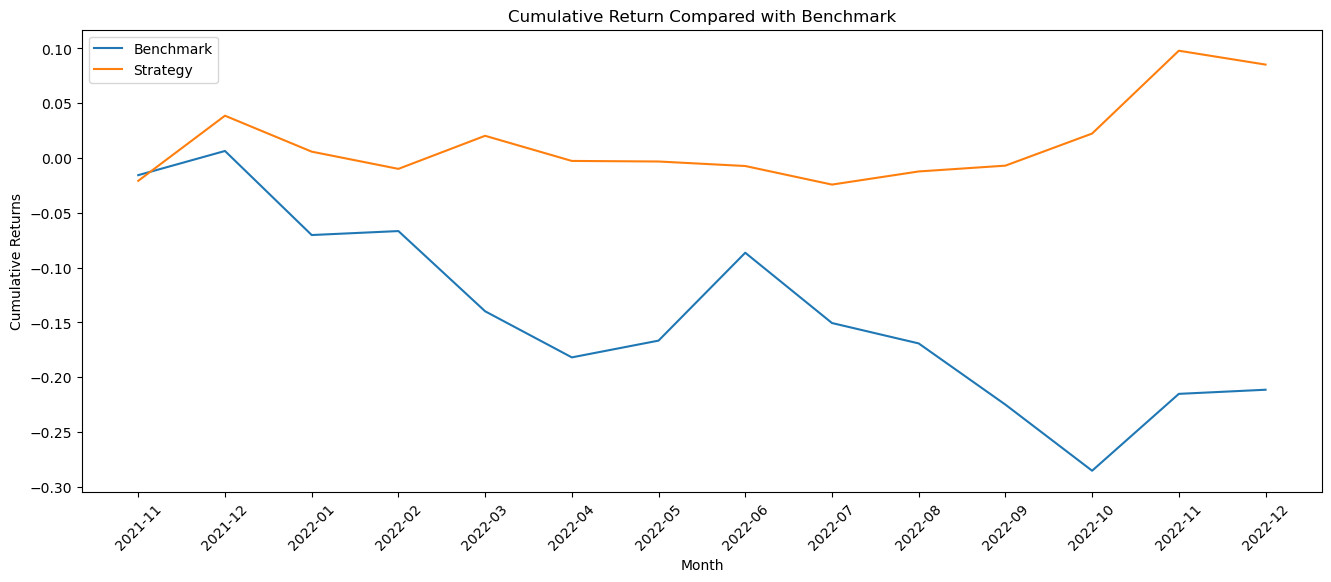

In [12]:
cumulative_returns = (1 + df).cumprod() - 1
plt.plot(cumulative_returns.index, cumulative_returns['Benchmark'], label='Benchmark')
plt.plot(cumulative_returns.index, cumulative_returns['Strategy'], label='Strategy')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Return Compared with Benchmark')
plt.legend()
plt.show()